In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from itertools import product

In [104]:
df_1= pd.read_csv('dataset_1.csv',parse_dates=[0])
print(f"Shape: {df_1.shape}\n\ndtypes:\n{df_1.dtypes}\n")
df_1.head()

Shape: (252, 4)

dtypes:
Date       datetime64[ns]
Country            object
Product            object
Intake              int64
dtype: object



,Date,Country,Product,Intake
0,2019-01-31,US,A,110
1,2019-02-28,US,A,86
2,2019-03-31,US,A,92
3,2019-04-30,US,A,113
4,2019-05-31,US,A,124


In [105]:
df_1.shape,df_1.dtypes

((252, 4),
 Date       datetime64[ns]
 Country            object
 Product            object
 Intake              int64
 dtype: object)

In [106]:
df_2 = pd.read_csv('dataset_2.csv',parse_dates=[0,1])
print(f"Shape: {df_2.shape}\n\ndtypes:\n{df_2.dtypes}\n")
df_2.head()

Shape: (3654, 5)

dtypes:
Date             datetime64[ns]
Intake Month     datetime64[ns]
Country                  object
Product                  object
Net Customers             int64
dtype: object



,Date,Intake Month,Country,Product,Net Customers
0,2019-01-31,2019-01-31,US,A,110
1,2019-02-28,2019-01-31,US,A,88
2,2019-03-31,2019-01-31,US,A,83
3,2019-04-30,2019-01-31,US,A,77
4,2019-05-31,2019-01-31,US,A,75


In [107]:
# df_3[~df_3.Intake.isnull()]

In [108]:
# df_2['Date'] = pd.to_datetime(df_2['Date'])
# df_2['Intake Month'] = pd.to_datetime(df_2['Intake Month'])
# df_2 = df_2.sort_values(by=['Product','Country','Date','Intake Month']).reset_index(drop=True)
# df_2

In [109]:
df_2[df_2['Date']==df_2['Intake Month']]

,Date,Intake Month,Country,Product,Net Customers
0,2019-01-31,2019-01-31,US,A,110
28,2019-02-28,2019-02-28,US,A,86
55,2019-03-31,2019-03-31,US,A,92
81,2019-04-30,2019-04-30,US,A,113
106,2019-05-31,2019-05-31,US,A,124
...,...,...,...,...,...
3639,2020-12-31,2020-12-31,GB,C,58
3644,2021-01-31,2021-01-31,GB,C,59
3648,2021-02-28,2021-02-28,GB,C,60
3651,2021-03-31,2021-03-31,GB,C,61


In [110]:
# df_3 = df_2[df_2['Date']==df_2['Intake Month']].merge(df_1,how='left',on=['Date','Country','Product',])
# df_3[df_3['Net Customers']!=df_3['Intake']]

In [111]:
#df_2['months_since_acquisition'] = ((df_2['Date'] - df_2['Intake Month'])/np.timedelta64(1, 'M')).map(lambda x : np.round(x)).astype('int') #doesn't work because of rounding issues

def get_date_int(df, column):
   year = df[column].dt.year
   month = df[column].dt.month
   return year, month

# Get the integers for the date parts from the 'InvoiceMonth' column

date_year, date_month = get_date_int(df_2, 'Date')

# Get the integers for date parts from the 'Cohortmonth' column

cohort_year, cohort_month = get_date_int(df_2, 'Intake Month')

# Calculate difference in years
years_diff = date_year - cohort_year

# Calculate difference in months
months_diff = date_month - cohort_month

# Extract the difference in months from all previous values

df_2['months_since_acquisition'] = years_diff * 12 + months_diff
df_2.head()

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition
0,2019-01-31,2019-01-31,US,A,110,0
1,2019-02-28,2019-01-31,US,A,88,1
2,2019-03-31,2019-01-31,US,A,83,2
3,2019-04-30,2019-01-31,US,A,77,3
4,2019-05-31,2019-01-31,US,A,75,4


In [112]:
df_2[(df_2['Intake Month']=='2019-01-31')&(df_2.Product=='A')&(df_2.Country=='CA')]

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition
1218,2019-01-31,2019-01-31,CA,A,17,0
1219,2019-02-28,2019-01-31,CA,A,13,1
1220,2019-03-31,2019-01-31,CA,A,12,2
1221,2019-04-30,2019-01-31,CA,A,12,3
1222,2019-05-31,2019-01-31,CA,A,11,4
1223,2019-06-30,2019-01-31,CA,A,11,5
1224,2019-07-31,2019-01-31,CA,A,11,6
1225,2019-08-31,2019-01-31,CA,A,11,7
1226,2019-09-30,2019-01-31,CA,A,10,8
1227,2019-10-31,2019-01-31,CA,A,10,9


In [113]:
# df_2['int_months']=df_2['months_since_acquisition'].astype('int')
# df_2[(df_2['Intake Month']=='2019-01-31')&(df_2.Product=='A')&(df_2.Country=='CA')]

In [114]:
# # df_2['months_since_acquisition'] = ((df_2['Date'] - df_2['Intake Month'])/np.timedelta64(1, 'M')).map(lambda x : np.round(x)).astype('int')
# df_2['months_since_acquisition'] = ((df_2['Date'] - df_2['Intake Month'])/np.timedelta64(1, 'M'))

# df_2.head(10)

In [115]:
df_2['churn_customers'] = df_2.groupby(['Country','Product','Intake Month'])['Net Customers'].diff().abs().fillna(0)
df_2.head(10)

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers
0,2019-01-31,2019-01-31,US,A,110,0,0.0
1,2019-02-28,2019-01-31,US,A,88,1,22.0
2,2019-03-31,2019-01-31,US,A,83,2,5.0
3,2019-04-30,2019-01-31,US,A,77,3,6.0
4,2019-05-31,2019-01-31,US,A,75,4,2.0
5,2019-06-30,2019-01-31,US,A,72,5,3.0
6,2019-07-31,2019-01-31,US,A,71,6,1.0
7,2019-08-31,2019-01-31,US,A,70,7,1.0
8,2019-09-30,2019-01-31,US,A,69,8,1.0
9,2019-10-31,2019-01-31,US,A,69,9,0.0


In [116]:
df_2['Date_month'] = df_2['Date'].dt.month
df_2['Date_year'] = df_2['Date'].dt.year
df_2['Cohort_month'] = df_2['Intake Month'].dt.month
df_2['Cohort_year'] = df_2['Intake Month'].dt.year
df_2

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year
0,2019-01-31,2019-01-31,US,A,110,0,0.0,1,2019,1,2019
1,2019-02-28,2019-01-31,US,A,88,1,22.0,2,2019,1,2019
2,2019-03-31,2019-01-31,US,A,83,2,5.0,3,2019,1,2019
3,2019-04-30,2019-01-31,US,A,77,3,6.0,4,2019,1,2019
4,2019-05-31,2019-01-31,US,A,75,4,2.0,5,2019,1,2019
...,...,...,...,...,...,...,...,...,...,...,...
3649,2021-03-31,2021-02-28,GB,C,47,1,13.0,3,2021,2,2021
3650,2021-04-30,2021-02-28,GB,C,44,2,3.0,4,2021,2,2021
3651,2021-03-31,2021-03-31,GB,C,61,0,0.0,3,2021,3,2021
3652,2021-04-30,2021-03-31,GB,C,44,1,17.0,4,2021,3,2021


In [117]:
#get cohort size
df = df_2.merge(df_1,how='left',left_on=['Intake Month','Country','Product'],right_on=['Date','Country','Product'])
df = df.drop(["Date_y"],axis=1).rename(columns={'Date_x':"Date","Intake":"Cohort_size"})
df.head()

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size
0,2019-01-31,2019-01-31,US,A,110,0,0.0,1,2019,1,2019,110
1,2019-02-28,2019-01-31,US,A,88,1,22.0,2,2019,1,2019,110
2,2019-03-31,2019-01-31,US,A,83,2,5.0,3,2019,1,2019,110
3,2019-04-30,2019-01-31,US,A,77,3,6.0,4,2019,1,2019,110
4,2019-05-31,2019-01-31,US,A,75,4,2.0,5,2019,1,2019,110


In [118]:
df['Cohort_name'] = df['Intake Month'].dt.strftime('%b-%y')
df['retention_rate'] = 100 * df['Net Customers'] / df['Cohort_size']
df.head()

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate
0,2019-01-31,2019-01-31,US,A,110,0,0.0,1,2019,1,2019,110,Jan-19,100.000000
1,2019-02-28,2019-01-31,US,A,88,1,22.0,2,2019,1,2019,110,Jan-19,80.000000
2,2019-03-31,2019-01-31,US,A,83,2,5.0,3,2019,1,2019,110,Jan-19,75.454545
3,2019-04-30,2019-01-31,US,A,77,3,6.0,4,2019,1,2019,110,Jan-19,70.000000
4,2019-05-31,2019-01-31,US,A,75,4,2.0,5,2019,1,2019,110,Jan-19,68.181818


In [119]:
# df[mask].loc[df['Intake Month']=='2019-01-31']

In [120]:
df[(df.Country=='CA')&(df.Product=='B')].sort_values(by='months_since_acquisition',ascending=False)

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate
1651,2021-04-30,2019-01-31,CA,B,0,27,0.0,4,2021,1,2019,0,Jan-19,NaN
1650,2021-03-31,2019-01-31,CA,B,0,26,0.0,3,2021,1,2019,0,Jan-19,NaN
1678,2021-04-30,2019-02-28,CA,B,0,26,0.0,4,2021,2,2019,0,Feb-19,NaN
1649,2021-02-28,2019-01-31,CA,B,0,25,0.0,2,2021,1,2019,0,Jan-19,NaN
1677,2021-03-31,2019-02-28,CA,B,0,25,0.0,3,2021,2,2019,0,Feb-19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,2020-05-31,2020-05-31,CA,B,32,0,0.0,5,2020,5,2020,32,May-20,100.0
1964,2020-06-30,2020-06-30,CA,B,48,0,0.0,6,2020,6,2020,48,Jun-20,100.0
1975,2020-07-31,2020-07-31,CA,B,0,0,0.0,7,2020,7,2020,0,Jul-20,NaN
1985,2020-08-31,2020-08-31,CA,B,0,0,0.0,8,2020,8,2020,0,Aug-20,NaN


### Monthly cohorts by Country/Product

In [19]:

# sns.heatmap(cohort_size,
#                 annot=True, 
#                 cbar=False, 
#                 fmt='g', 
#                 cmap=white_cmap)

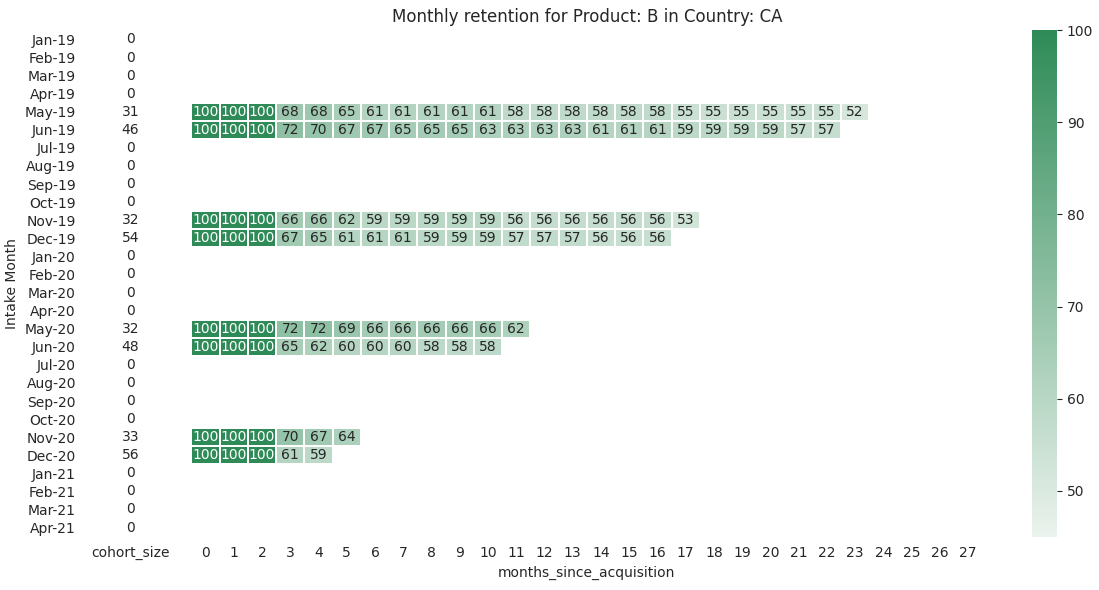

In [20]:
PRODUCT = 'B'
COUNTRY = 'CA'
TITLE=f"Monthly retention for Product: {PRODUCT} in Country: {COUNTRY}"

mask = (df.Country==COUNTRY)&(df.Product==PRODUCT)
# tmp2 = tmp2[tmp2.Country==COUNTRY].pivot(index='Intake Month', columns='months_since_acquisition', values='retention_rate')

tmp = df.loc[mask].pivot(index='Intake Month', columns='months_since_acquisition', values='retention_rate')
cohort_size = pd.DataFrame(df[mask].pivot(index='Intake Month', columns='months_since_acquisition', values='Cohort_size').iloc[:,0].astype(int)).rename(columns={0: 'cohort_size'})

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    seagreen_color = sns.light_palette("seagreen", as_cmap=True)

    sns.heatmap(data=tmp,
    annot = True,
    # cmap = 'Blues',
    cmap= seagreen_color,
    vmin = 45, #the min of the dataset
    vmax = 100.0,
    fmt = '.0f',
    linewidth = 0.3,
    yticklabels='',
    ax=ax[1])
    # sns.light_palette("seagreen", as_cmap=True)
    ax[1].set_title(TITLE, fontsize=12)
    ax[1].set(ylabel='')

    # cohort size
    white_cmap = mcolors.ListedColormap(['white'])

    sns.heatmap(cohort_size, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap,
                yticklabels=tmp.index.strftime('%b-%y').to_list(),
                ax=ax[0])

    fig.tight_layout()

### Monthly cohorts by Country

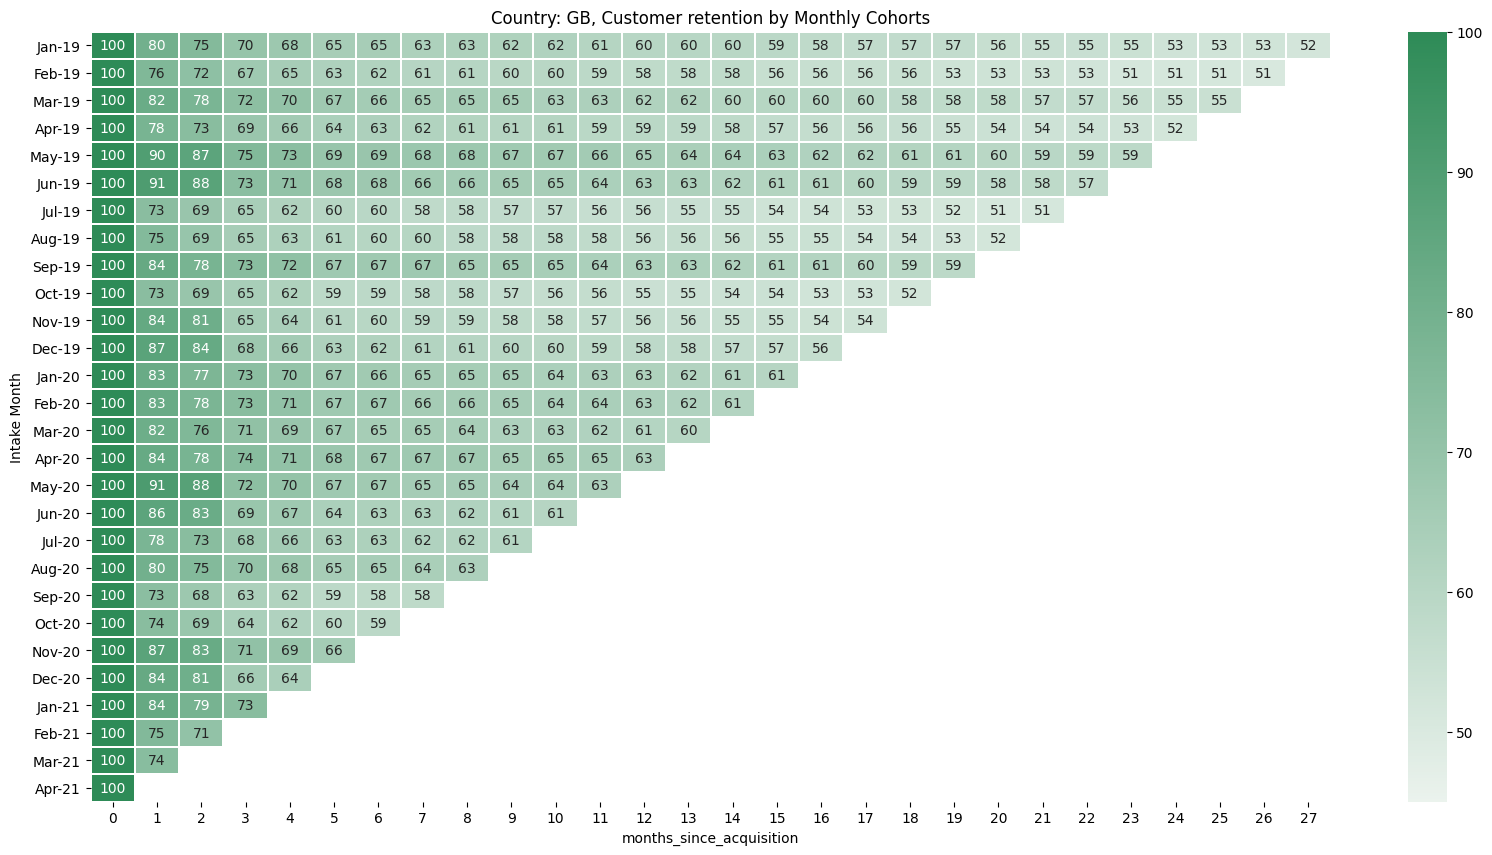

In [21]:
COUNTRY = 'GB'

tmp2 = df.groupby(['Country','Intake Month','months_since_acquisition'])['retention_rate'].mean().reset_index()

tmp2 = tmp2[tmp2.Country==COUNTRY].pivot(index='Intake Month', columns='months_since_acquisition', values='retention_rate')
# Initialize inches palot figure
plt.figure(figsize=(20,10))

# Add a title
plt.title(f'Country: {COUNTRY}, Customer retention by Monthly Cohorts')

# Create the heatmap
seagreen_color = sns.light_palette("seagreen", as_cmap=True)

sns.heatmap(data=tmp2,
annot = True,
# cmap = 'Blues',
cmap= seagreen_color,
vmin = 45, #the min of the dataset
vmax = 100.0,
fmt = '.0f',
linewidth = 0.3,
yticklabels=tmp2.index.strftime('%b-%y').to_list())
# sns.light_palette("seagreen", as_cmap=True)
plt.show();

## Monthly cohorts by Product

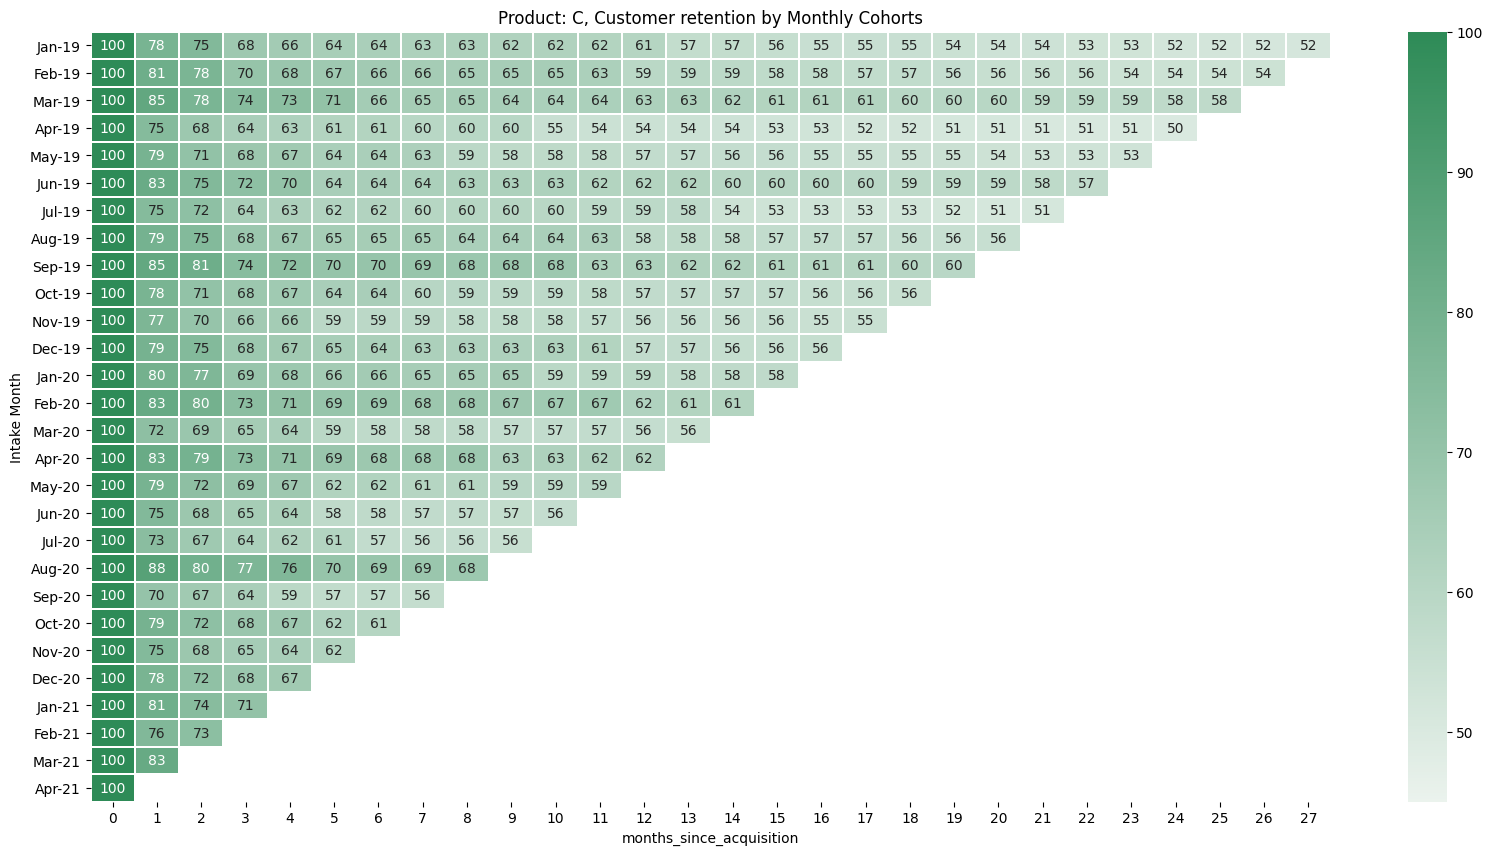

In [22]:
PRODUCT = 'C'

tmp3 = df.groupby(['Product','Intake Month','months_since_acquisition'])['retention_rate'].mean().reset_index()

tmp3 = tmp3[tmp3.Product==PRODUCT].pivot(index='Intake Month', columns='months_since_acquisition', values='retention_rate')
# Initialize inches palot figure
plt.figure(figsize=(20,10))

# Add a title
plt.title(f'Product: {PRODUCT}, Customer retention by Monthly Cohorts')

# Create the heatmap
seagreen_color = sns.light_palette("seagreen", as_cmap=True)

sns.heatmap(data=tmp3,
annot = True,
# cmap = 'Blues',
cmap= seagreen_color,
vmin = 45, #the min of the dataset
vmax = 100.0,
fmt = '.0f',
linewidth = 0.3,
yticklabels=tmp3.index.strftime('%b-%y').to_list())
# sns.light_palette("seagreen", as_cmap=True)
plt.show();

## Modelling

In [34]:
# df.to_csv('df_ret_rate.csv',index=False)

In [55]:
PRODUCT = 'A'
COUNTRY = 'CA'

mask = (df['Product']==PRODUCT) & (df['Country']==COUNTRY) #(df_2['Intake Month']==INTAKE_MONTH) & 

mini_df = df.loc[mask,:]
mini_df.head()

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate
1218,2019-01-31,2019-01-31,CA,A,17,0,0.0,1,2019,1,2019,17,Jan-19,100.000000
1219,2019-02-28,2019-01-31,CA,A,13,1,4.0,2,2019,1,2019,17,Jan-19,76.470588
1220,2019-03-31,2019-01-31,CA,A,12,2,1.0,3,2019,1,2019,17,Jan-19,70.588235
1221,2019-04-30,2019-01-31,CA,A,12,3,0.0,4,2019,1,2019,17,Jan-19,70.588235
1222,2019-05-31,2019-01-31,CA,A,11,4,1.0,5,2019,1,2019,17,Jan-19,64.705882


In [24]:
date_train_test_split = '2020-12-31'

train_df = mini_df[mini_df.Date<=date_train_test_split]
train_df.head()

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate
812,2019-01-31,2019-01-31,US,C,50,0,0.0,1,2019,1,2019,50,Jan-19,100.000000
813,2019-02-28,2019-01-31,US,C,40,1,10.0,2,2019,1,2019,50,Jan-19,80.000000
814,2019-02-28,2019-02-28,US,C,51,0,0.0,2,2019,2,2019,51,Feb-19,100.000000
815,2019-03-31,2019-01-31,US,C,38,2,2.0,3,2019,1,2019,50,Jan-19,76.000000
816,2019-03-31,2019-02-28,US,C,45,1,6.0,3,2019,2,2019,51,Feb-19,88.235294


In [25]:
mini_df.head(3)

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate
812,2019-01-31,2019-01-31,US,C,50,0,0.0,1,2019,1,2019,50,Jan-19,100.0
813,2019-02-28,2019-01-31,US,C,40,1,10.0,2,2019,1,2019,50,Jan-19,80.0
814,2019-02-28,2019-02-28,US,C,51,0,0.0,2,2019,2,2019,51,Feb-19,100.0


### Net customers dependency with time

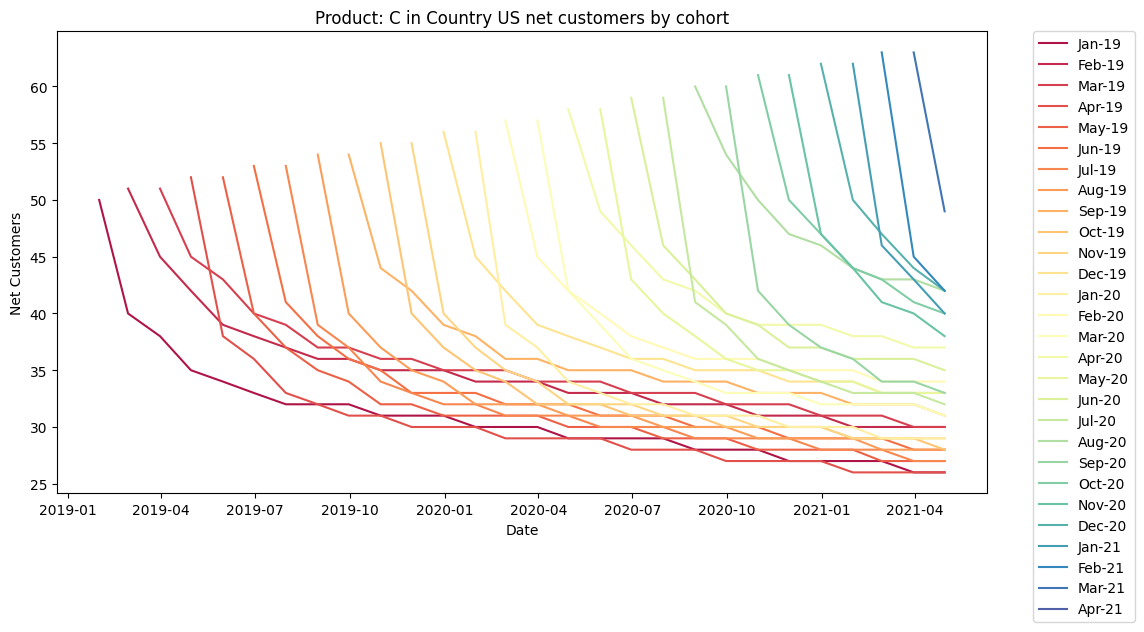

In [26]:
TITLE = f"Product: {PRODUCT} in Country {COUNTRY} net customers by cohort"
plt.figure(figsize=(12,6))
# g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='retention_rate',palette='Spectral')
g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='Net Customers',palette='Spectral')
g.set_title(TITLE)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### Dependency of retention rate with recency (absolute age cohort)

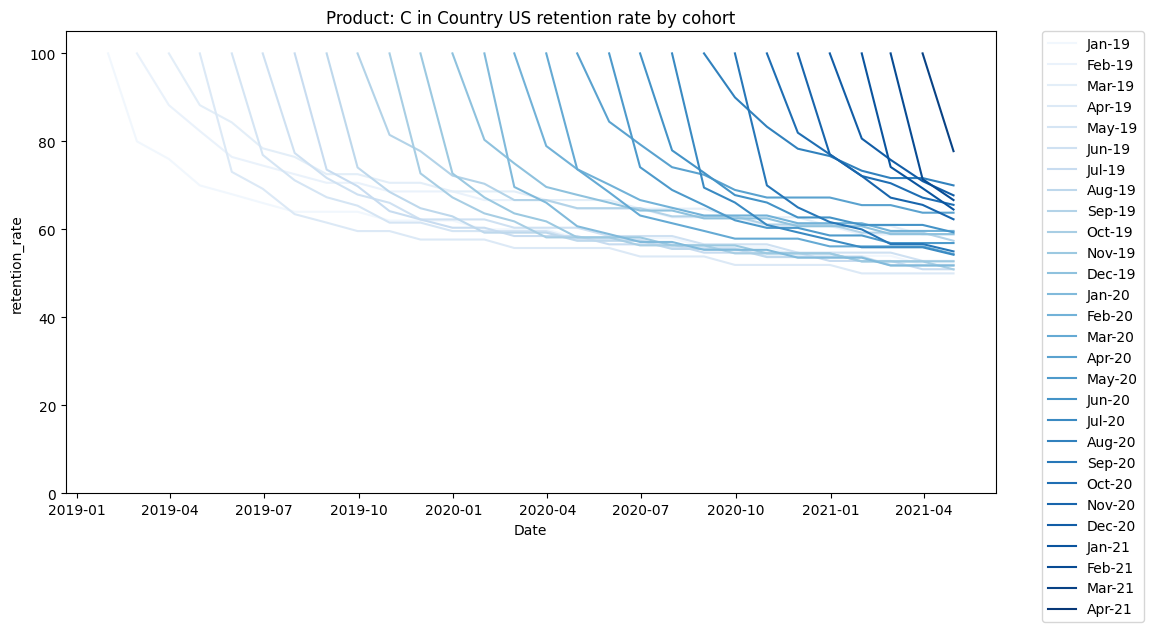

In [27]:
TITLE = f"Product: {PRODUCT} in Country {COUNTRY} retention rate by cohort"
plt.figure(figsize=(12,6))
# g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='retention_rate',palette='Spectral')
g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='retention_rate',palette='Blues')
g.set_title(TITLE)
g.set(ylim=(0,105))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [230]:
# !pip install lifelines
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines import ExponentialFitter
from lifelines.utils import survival_events_from_table

T, E, W = survival_events_from_table(mini_df.set_index('months_since_acquisition'), observed_deaths_col='churn_customers', censored_col='Net Customers')
# weights, W, is the number of occurrences of each observation - helps with data compression.

# kmf = KaplanMeierFitter().fit(T, E, weights=W)
exf = ExponentialFitter().fit(T+0.0001, E, weights=W)


In [240]:
T

array([ 0,  1,  0,  2,  1,  3,  3,  2,  4,  4,  3,  3,  5,  5,  4,  4,  6,
        6,  5,  5,  0,  7,  7,  6,  6,  1,  0,  8,  8,  7,  7,  2,  1,  9,
        9,  8,  8,  3,  3,  2, 10, 10,  9,  9,  4,  4,  3,  3, 11, 11, 10,
       10,  5,  5,  4,  4, 12, 12, 11, 11,  6,  6,  5,  5,  0, 13, 13, 12,
       12,  7,  7,  6,  6,  1,  0, 14, 14, 13, 13,  8,  8,  7,  7,  2,  1,
       15, 15, 14, 14,  9,  9,  8,  8,  3,  3,  2, 16, 16, 15, 15, 10, 10,
        9,  9,  4,  4,  3,  3, 17, 17, 16, 16, 11, 11, 10, 10,  5,  5,  4,
        4, 18, 18, 17, 17, 12, 12, 11, 11,  6,  6,  5,  5,  0, 19, 19, 18,
       18, 13, 13, 12, 12,  7,  7,  6,  6,  1,  0, 20, 20, 19, 19, 14, 14,
       13, 13,  8,  8,  7,  7,  2,  1, 21, 21, 20, 20, 15, 15, 14, 14,  9,
        9,  8,  8,  3,  3,  2, 22, 22, 21, 21, 16, 16, 15, 15, 10, 10,  9,
        9,  4,  4,  3,  3, 23, 23, 22, 22, 17, 17, 16, 16, 11, 11, 10, 10,
        5,  5,  4,  4])

In [182]:
mini_df.head(3)

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Cohort_month,Cohort_year,Date_month,Date_year,Cohort_size,Cohort_name,retention_rate
1624,2019-01-31,2019-01-31,CA,B,0,0,0.0,1,2019,1,2019,0,Jan-19,NaN
1625,2019-02-28,2019-01-31,CA,B,0,1,0.0,1,2019,2,2019,0,Jan-19,NaN
1626,2019-03-31,2019-01-31,CA,B,0,2,0.0,1,2019,3,2019,0,Jan-19,NaN


In [195]:
# TITLE = f"Product: {PRODUCT} in Country {COUNTRY} retention rate by cohort"
# plt.figure(figsize=(12,6))
# g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='retention_rate',palette='Spectral')
# g.set_title(TITLE)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### Dependency with months since acquisition

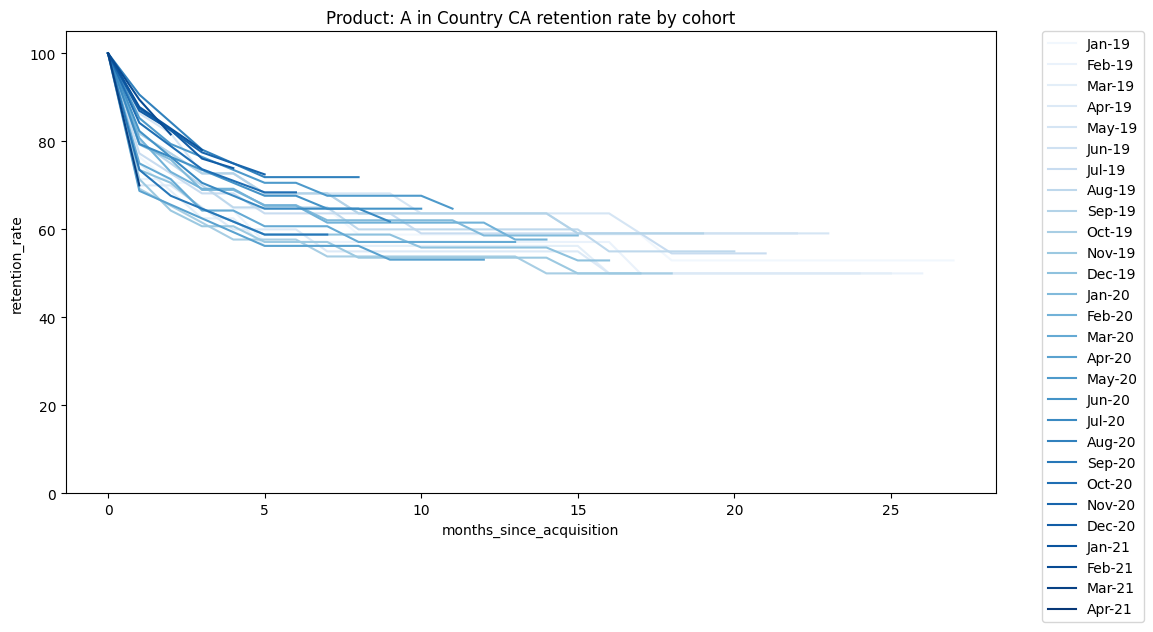

In [30]:
TITLE = f"Product: {PRODUCT} in Country {COUNTRY} retention rate by cohort"
plt.figure(figsize=(12,6))
# g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='retention_rate',palette='Spectral')
g = sns.lineplot(data=mini_df,hue='Cohort_name',x='months_since_acquisition',y='retention_rate',palette='Blues')
g.set_title(TITLE)
g.set(ylim=(0, 105))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [31]:
mini_df.to_csv('mini')

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate
1218,2019-01-31,2019-01-31,CA,A,17,0,0.0,1,2019,1,2019,17,Jan-19,100.000000
1219,2019-02-28,2019-01-31,CA,A,13,1,4.0,2,2019,1,2019,17,Jan-19,76.470588
1220,2019-03-31,2019-01-31,CA,A,12,2,1.0,3,2019,1,2019,17,Jan-19,70.588235
1221,2019-04-30,2019-01-31,CA,A,12,3,0.0,4,2019,1,2019,17,Jan-19,70.588235
1222,2019-05-31,2019-01-31,CA,A,11,4,1.0,5,2019,1,2019,17,Jan-19,64.705882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,2021-03-31,2021-02-28,CA,A,34,1,4.0,3,2021,2,2021,38,Feb-21,89.473684
1620,2021-04-30,2021-02-28,CA,A,31,2,3.0,4,2021,2,2021,38,Feb-21,81.578947
1621,2021-03-31,2021-03-31,CA,A,40,0,0.0,3,2021,3,2021,40,Mar-21,100.000000
1622,2021-04-30,2021-03-31,CA,A,28,1,12.0,4,2021,3,2021,40,Mar-21,70.000000


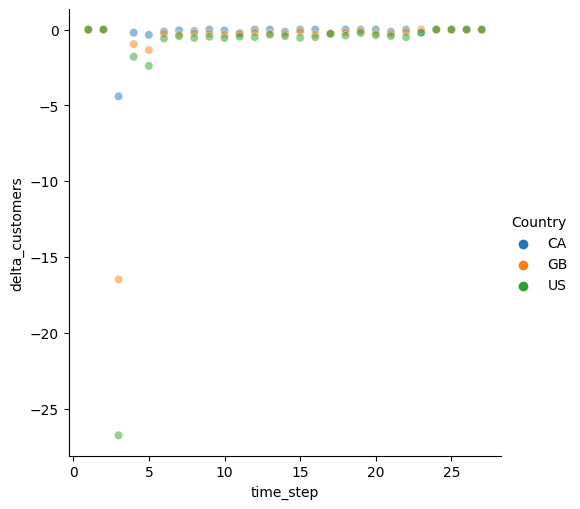

In [32]:
# df_2[df_2['delta_customers']0

tmp = df_2[df_2.Product=='B'].groupby(['Country','time_step'])['delta_customers'].mean().reset_index()
tmp.head()
sns.relplot(data=tmp,x='time_step',hue='Country',y='delta_customers',alpha=0.5)

### Baseline

In [63]:
# df

In [66]:
# mask = (df['Cohort_year']==2019) & (df['months_since_acquisition']>=6)

df.loc[mask].groupby(['Product','Country','Intake Month'])['retention_rate'].transform('min')

6       51.818182
7       51.818182
8       51.818182
9       51.818182
10      51.818182
          ...    
3513    59.183673
3514    59.183673
3515    59.183673
3516    59.183673
3517    59.183673
Name: retention_rate, Length: 1782, dtype: float64

In [77]:
import warnings
warnings.filterwarnings("ignore")

##Only 2019

mask = (mini_df['Cohort_year']==2019) & (mini_df['months_since_acquisition']>=6)

##retention rate

mini_df.loc[mask,'retention_rate_6m'] = mini_df.loc[mask].groupby(['Product','Country','Intake Month'])['retention_rate'].transform('min')
mini_df.loc[mask,'retention_rate_last'] = mini_df.loc[mask].groupby(['Product','Country','Intake Month'])['retention_rate'].transform('max')
mini_df.loc[mask,'months_since_acquisition_last'] = mini_df.loc[mask].groupby(['Product','Country','Intake Month'])['months_since_acquisition'].transform('max')
mini_df.head(10)


,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate,retention_rate_6m,retention_rate_last,months_since_acquisition_last
1218,2019-01-31,2019-01-31,CA,A,17.0,0.0,0.0,1.0,2019.0,1.0,2019.0,17.0,Jan-19,100.000000,NaN,NaN,NaN
1219,2019-02-28,2019-01-31,CA,A,13.0,1.0,4.0,2.0,2019.0,1.0,2019.0,17.0,Jan-19,76.470588,NaN,NaN,NaN
1220,2019-03-31,2019-01-31,CA,A,12.0,2.0,1.0,3.0,2019.0,1.0,2019.0,17.0,Jan-19,70.588235,NaN,NaN,NaN
1221,2019-04-30,2019-01-31,CA,A,12.0,3.0,0.0,4.0,2019.0,1.0,2019.0,17.0,Jan-19,70.588235,NaN,NaN,NaN
1222,2019-05-31,2019-01-31,CA,A,11.0,4.0,1.0,5.0,2019.0,1.0,2019.0,17.0,Jan-19,64.705882,NaN,NaN,NaN
1223,2019-06-30,2019-01-31,CA,A,11.0,5.0,0.0,6.0,2019.0,1.0,2019.0,17.0,Jan-19,64.705882,NaN,NaN,NaN
1224,2019-07-31,2019-01-31,CA,A,11.0,6.0,0.0,7.0,2019.0,1.0,2019.0,17.0,Jan-19,64.705882,52.941176,64.705882,27.0
1225,2019-08-31,2019-01-31,CA,A,11.0,7.0,0.0,8.0,2019.0,1.0,2019.0,17.0,Jan-19,64.705882,52.941176,64.705882,27.0
1226,2019-09-30,2019-01-31,CA,A,10.0,8.0,1.0,9.0,2019.0,1.0,2019.0,17.0,Jan-19,58.823529,52.941176,64.705882,27.0
1227,2019-10-31,2019-01-31,CA,A,10.0,9.0,0.0,10.0,2019.0,1.0,2019.0,17.0,Jan-19,58.823529,52.941176,64.705882,27.0


In [88]:
tmp = mini_df[['Product','Country','Intake Month','retention_rate_6m','retention_rate_last','months_since_acquisition_last']].dropna().drop_duplicates()
tmp.head(4)

,Product,Country,Intake Month,retention_rate_6m,retention_rate_last,months_since_acquisition_last
1224,A,CA,2019-01-31,52.941176,64.705882,27.0
1252,A,CA,2019-02-28,50.000000,57.142857,26.0
1279,A,CA,2019-03-31,50.000000,56.250000,25.0
1305,A,CA,2019-04-30,50.000000,60.000000,24.0


In [89]:
tmp['delta_retention_last_to_6m'] = tmp['retention_rate_last'] - tmp['retention_rate_6m'] 
tmp['months_since_6m'] = tmp['months_since_acquisition_last'] - 6
tmp['retention_slope'] = tmp['delta_retention_last_to_6m'] / tmp['months_since_6m']
tmp

,Product,Country,Intake Month,retention_rate_6m,retention_rate_last,months_since_acquisition_last,delta_retention_last_to_6m,months_since_6m,retention_slope
1224,A,CA,2019-01-31,52.941176,64.705882,27.0,11.764706,21.0,0.560224
1252,A,CA,2019-02-28,50.000000,57.142857,26.0,7.142857,20.0,0.357143
1279,A,CA,2019-03-31,50.000000,56.250000,25.0,6.250000,19.0,0.328947
1305,A,CA,2019-04-30,50.000000,60.000000,24.0,10.000000,18.0,0.555556
1330,A,CA,2019-05-31,59.090909,68.181818,23.0,9.090909,17.0,0.534759
1354,A,CA,2019-06-30,59.090909,68.181818,22.0,9.090909,16.0,0.568182
1377,A,CA,2019-07-31,54.545455,63.636364,21.0,9.090909,15.0,0.606061
1399,A,CA,2019-08-31,55.000000,65.000000,20.0,10.000000,14.0,0.714286
1420,A,CA,2019-09-30,59.090909,68.181818,19.0,9.090909,13.0,0.699301
1440,A,CA,2019-10-31,50.000000,57.692308,18.0,7.692308,12.0,0.641026


In [87]:
mini_df['actuals/forecast'] = 'actuals'
mini_df

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate,retention_rate_6m,retention_rate_last,months_since_acquisition_last,actuals/forecast
1218,2019-01-31,2019-01-31,CA,A,17.0,0.0,0.0,1.0,2019.0,1.0,2019.0,17.0,Jan-19,100.000000,NaN,NaN,NaN,actuals
1219,2019-02-28,2019-01-31,CA,A,13.0,1.0,4.0,2.0,2019.0,1.0,2019.0,17.0,Jan-19,76.470588,NaN,NaN,NaN,actuals
1220,2019-03-31,2019-01-31,CA,A,12.0,2.0,1.0,3.0,2019.0,1.0,2019.0,17.0,Jan-19,70.588235,NaN,NaN,NaN,actuals
1221,2019-04-30,2019-01-31,CA,A,12.0,3.0,0.0,4.0,2019.0,1.0,2019.0,17.0,Jan-19,70.588235,NaN,NaN,NaN,actuals
1222,2019-05-31,2019-01-31,CA,A,11.0,4.0,1.0,5.0,2019.0,1.0,2019.0,17.0,Jan-19,64.705882,NaN,NaN,NaN,actuals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,2021-04-30,2021-02-28,CA,A,31.0,2.0,3.0,4.0,2021.0,2.0,2021.0,38.0,Feb-21,81.578947,NaN,NaN,NaN,actuals
1621,2021-03-31,2021-03-31,CA,A,40.0,0.0,0.0,3.0,2021.0,3.0,2021.0,40.0,Mar-21,100.000000,NaN,NaN,NaN,actuals
1622,2021-04-30,2021-03-31,CA,A,28.0,1.0,12.0,4.0,2021.0,3.0,2021.0,40.0,Mar-21,70.000000,NaN,NaN,NaN,actuals
1623,2021-04-30,2021-04-30,CA,A,43.0,0.0,0.0,4.0,2021.0,4.0,2021.0,43.0,Apr-21,100.000000,NaN,NaN,NaN,actuals


In [90]:
df['Date'].max()

Timestamp('2021-04-30 00:00:00')

In [96]:
df['Intake Month'].head(5).values
intake_months = ['2019-01-31', '2019-01-31','2019-01-31', '2019-01-31','2019-01-31']
products = ['A','B','C']
countries = ['CA','GB','US']

array(['2019-01-31T00:00:00.000000000', '2019-01-31T00:00:00.000000000',
       '2019-01-31T00:00:00.000000000', '2019-01-31T00:00:00.000000000',
       '2019-01-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [99]:
start_period = "2021-05-31"
end_period = pd.to_datetime(start_period) + pd.DateOffset(months=23)

forecast_dates = pd.date_range(start=start_period, end=end_period, freq='M')
# forecast_dates = pd.Series(date_range)

print(forecast_dates)

DatetimeIndex(['2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30'],
              dtype='datetime64[ns]', freq='M')


In [175]:
##Create forecast template
# cartesian_product_intake = list(product(forecast_dates,products, countries))
# df_forecast_intake = pd.DataFrame(cartesian_product_intake, columns=['Date', 'Product', 'Country'])
# df_forecast_intake['Intake'] = 0
# df_forecast_intake.to_csv('df_forecast_intake.csv',index=False)

# Import forecast
df_forecast_intake = pd.read_csv('saved_forecast_intake.csv',usecols=['Date','Country','Product','Intake','Type'],parse_dates=[0])
print(f"shape df forecast: {df_forecast_intake.shape}")
df_forecast_intake.head()

shape df forecast: (216, 5)


,Date,Country,Product,Intake,Type
0,2021-05-31,CA,A,46,Forecast
1,2021-05-31,GB,A,134,Forecast
2,2021-05-31,US,A,148,Forecast
3,2021-05-31,CA,B,33,Forecast
4,2021-05-31,GB,B,143,Forecast


In [189]:
# df_forecast_intake[df_forecast_intake['Intake']!=0]

In [172]:
intake_months_old_cohorts = df['Intake Month'].unique().tolist()
intake_months_new_cohorts = df_forecast_intake['Date'].unique().tolist()
intake_months = intake_months_old_cohorts + intake_months_new_cohorts

products = df['Product'].unique()
countries = df['Country'].unique()

# cartesian_product_net_customers = list(product(forecast_dates, intake_months, products, countries))
cartesian_product_net_customers = list(product(forecast_dates, intake_months, products, countries))

# Create a DataFrame from the Cartesian product

# Create a Cartesian product of the lists
df_forecast_net_customers = pd.DataFrame(cartesian_product_net_customers, columns=['Date', 'Intake Month', 'Product', 'Country'])

df_forecast_net_customers[df_forecast_net_customers['Intake Month']<=df_forecast_net_customers['Date']].reset_index(drop=True) #remove the lines where 'Intake Month' > 'Date', which happens for new cohorts
df_forecast_net_customers

,Date,Intake Month,Product,Country
0,2021-05-31,2019-01-31,A,US
1,2021-05-31,2019-01-31,A,CA
2,2021-05-31,2019-01-31,A,GB
3,2021-05-31,2019-01-31,B,US
4,2021-05-31,2019-01-31,B,CA
...,...,...,...,...
11227,2023-04-30,2023-04-30,B,CA
11228,2023-04-30,2023-04-30,B,GB
11229,2023-04-30,2023-04-30,C,US
11230,2023-04-30,2023-04-30,C,CA


In [181]:
date_split_past_future = '2021-04-30'

df_forecast_net_customers['Cohort_type'] = 'old'

df_forecast_net_customers.loc[df_forecast_net_customers['Intake Month']>date_split_past_future,'Cohort_type'] = 'new'
df_forecast_net_customers


,Date,Intake Month,Product,Country,Cohort_type
0,2021-05-31,2019-01-31,A,US,old
1,2021-05-31,2019-01-31,A,CA,old
2,2021-05-31,2019-01-31,A,GB,old
3,2021-05-31,2019-01-31,B,US,old
4,2021-05-31,2019-01-31,B,CA,old
...,...,...,...,...,...
11227,2023-04-30,2023-04-30,B,CA,new
11228,2023-04-30,2023-04-30,B,GB,new
11229,2023-04-30,2023-04-30,C,US,new
11230,2023-04-30,2023-04-30,C,CA,new


In [191]:
df.head(3)

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate
0,2019-01-31,2019-01-31,US,A,110,0,0.0,1,2019,1,2019,110,Jan-19,100.000000
1,2019-02-28,2019-01-31,US,A,88,1,22.0,2,2019,1,2019,110,Jan-19,80.000000
2,2019-03-31,2019-01-31,US,A,83,2,5.0,3,2019,1,2019,110,Jan-19,75.454545


In [197]:
df_2

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year
0,2019-01-31,2019-01-31,US,A,110,0,0.0,1,2019,1,2019
1,2019-02-28,2019-01-31,US,A,88,1,22.0,2,2019,1,2019
2,2019-03-31,2019-01-31,US,A,83,2,5.0,3,2019,1,2019
3,2019-04-30,2019-01-31,US,A,77,3,6.0,4,2019,1,2019
4,2019-05-31,2019-01-31,US,A,75,4,2.0,5,2019,1,2019
...,...,...,...,...,...,...,...,...,...,...,...
3649,2021-03-31,2021-02-28,GB,C,47,1,13.0,3,2021,2,2021
3650,2021-04-30,2021-02-28,GB,C,44,2,3.0,4,2021,2,2021
3651,2021-03-31,2021-03-31,GB,C,61,0,0.0,3,2021,3,2021
3652,2021-04-30,2021-03-31,GB,C,44,1,17.0,4,2021,3,2021


,Product,Country,Intake Month,Cohort_size,retention_rate
0,A,US,2019-01-31,110,100.000000
1,A,US,2019-01-31,110,80.000000
2,A,US,2019-01-31,110,75.454545
3,A,US,2019-01-31,110,70.000000
4,A,US,2019-01-31,110,68.181818
...,...,...,...,...,...
3649,C,GB,2021-02-28,60,78.333333
3650,C,GB,2021-02-28,60,73.333333
3651,C,GB,2021-03-31,61,100.000000
3652,C,GB,2021-03-31,61,72.131148


In [210]:
df_forecast_net_customers.loc[df_forecast_net_customers['Cohort_type']=='old'].merge(df[['Product','Country','Intake Month','Cohort_size']],how='left',on=['Product','Country','Intake Month'])

,Date,Intake Month,Product,Country,Cohort_type,Cohort_size_x,Cohort_size_y
0,2021-05-31,2019-01-31,A,US,old,NaN,110
1,2021-05-31,2019-01-31,A,US,old,NaN,110
2,2021-05-31,2019-01-31,A,US,old,NaN,110
3,2021-05-31,2019-01-31,A,US,old,NaN,110
4,2021-05-31,2019-01-31,A,US,old,NaN,110
...,...,...,...,...,...,...,...
87691,2023-04-30,2021-04-30,B,CA,old,NaN,0
87692,2023-04-30,2021-04-30,B,GB,old,NaN,0
87693,2023-04-30,2021-04-30,C,US,old,NaN,63
87694,2023-04-30,2021-04-30,C,CA,old,NaN,10


In [212]:
df_forecast_net_customers['Cohort_size'] = np.nan
# df_forecast_net_customers.loc[df_forecast_net_customers['Cohort_type']=='old','Cohort_size']
df_forecast_net_customers.loc[df_forecast_net_customers['Cohort_type']=='old','Cohort_size'] = df_forecast_net_customers.loc[df_forecast_net_customers['Cohort_type']=='old'].merge(df[['Product','Country','Intake Month','Cohort_size']],how='left',on=['Product','Country','Intake Month'])['Cohort_size_y']
df_forecast_net_customers

,Date,Intake Month,Product,Country,Cohort_type,Cohort_size
0,2021-05-31,2019-01-31,A,US,old,110.0
1,2021-05-31,2019-01-31,A,CA,old,110.0
2,2021-05-31,2019-01-31,A,GB,old,110.0
3,2021-05-31,2019-01-31,B,US,old,110.0
4,2021-05-31,2019-01-31,B,CA,old,110.0
...,...,...,...,...,...,...
11227,2023-04-30,2023-04-30,B,CA,new,NaN
11228,2023-04-30,2023-04-30,B,GB,new,NaN
11229,2023-04-30,2023-04-30,C,US,new,NaN
11230,2023-04-30,2023-04-30,C,CA,new,NaN


In [215]:
df_forecast_intake

,Date,Country,Product,Intake,Type
0,2021-05-31,CA,A,46,Forecast
1,2021-05-31,GB,A,134,Forecast
2,2021-05-31,US,A,148,Forecast
3,2021-05-31,CA,B,33,Forecast
4,2021-05-31,GB,B,143,Forecast
...,...,...,...,...,...
211,2023-04-30,GB,B,0,Forecast
212,2023-04-30,US,B,0,Forecast
213,2023-04-30,CA,C,12,Forecast
214,2023-04-30,GB,C,81,Forecast


In [220]:
df_forecast_intake.dtypes

Date       datetime64[ns]
Country            object
Product            object
Intake              int64
Type               object
dtype: object

In [221]:
df_forecast_net_customers.dtypes

Date            datetime64[ns]
Intake Month    datetime64[ns]
Product                 object
Country                 object
Cohort_type             object
Cohort_size            float64
dtype: object

In [219]:
df_forecast_net_customers.loc[df_forecast_net_customers['Cohort_type']=='old'].merge(df_forecast_intake[['Product','Country','Date','Intake']],how='left',left_on=['Product','Country','Intake Month'],right_on=['Product','Country','Date'])

,Date_x,Intake Month,Product,Country,Cohort_type,Cohort_size,Date_y,Intake
0,2021-05-31,2019-01-31,A,US,old,110.0,NaT,NaN
1,2021-05-31,2019-01-31,A,CA,old,110.0,NaT,NaN
2,2021-05-31,2019-01-31,A,GB,old,110.0,NaT,NaN
3,2021-05-31,2019-01-31,B,US,old,110.0,NaT,NaN
4,2021-05-31,2019-01-31,B,CA,old,110.0,NaT,NaN
...,...,...,...,...,...,...,...,...
6043,2023-04-30,2021-04-30,B,CA,old,17.0,NaT,NaN
6044,2023-04-30,2021-04-30,B,GB,old,17.0,NaT,NaN
6045,2023-04-30,2021-04-30,C,US,old,17.0,NaT,NaN
6046,2023-04-30,2021-04-30,C,CA,old,17.0,NaT,NaN


In [128]:
# df_forecast.loc[(df_forecast['Intake Month']=='2019-01-31')&(df_forecast['Country']=='US')&(df_forecast['Product']=='A')]